In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('NSTU_Students_data_transformed.csv')
target = data['target']
data = data.drop(columns=['target'])
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [4]:
clf = RandomForestClassifier(n_estimators=100, max_features=0.2)

In [5]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2)

In [6]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [7]:
mean_squared_error(y_pred=clf.predict(X_test), y_true=y_test)

np.float64(11.744186046511627)

In [8]:
import matplotlib.pyplot as plt

In [9]:
Q = []
A = []
o_range = range(1, 200, 2) 
for n_est in o_range:
  clf = RandomForestClassifier(n_estimators=n_est, max_features=0.5)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  Q.append(mean_squared_error(y_test, pred))
  A.append(accuracy_score(y_test, pred))

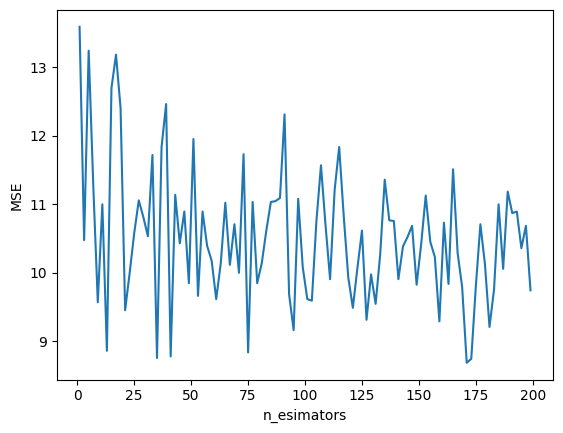

In [10]:
plt.plot(o_range, Q)
plt.xlabel('n_esimators')
plt.ylabel('MSE')
plt.show()

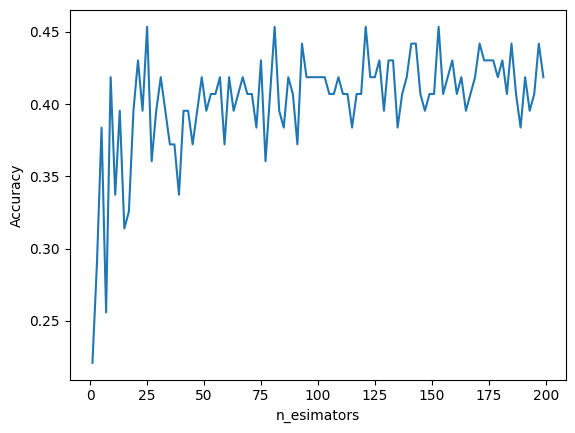

In [11]:
plt.plot(o_range, A)
plt.xlabel('n_esimators')
plt.ylabel('Accuracy')
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV

In [14]:
clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': range(1, 501, 50),             
    'max_features': ['sqrt', 'log2', None],  
    'max_depth': [10],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'class_weight':['balanced'],
    'criterion':['gini', 'entropy', 'log_loss']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=2, verbose=2)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на обучающей выборке:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Точность на тестовой выборке:", test_score)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


In [ ]:
best_model.predict(X_test)

In [22]:
import numpy as np

In [ ]:
grid_search.best_estimator_.feature_importances_
